# Chapter: Finding Groups in Process Data: Clustering & Mixture Modeling

# Topic: Etch data explore

In [1]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          exploration of Etch data
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [2]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# fetch data
import scipy.io

matlab_data = scipy.io.loadmat('MACHINE_Data.mat', struct_as_record = False)
Etch_data = matlab_data['LAMDATA']
calibration_dataAll = Etch_data[0,0].calibration # calibration_dataAll[i,0] corresponds to a 2D data from ith batch where columns correspond to different variables 

variable_names = Etch_data[0,0].variables

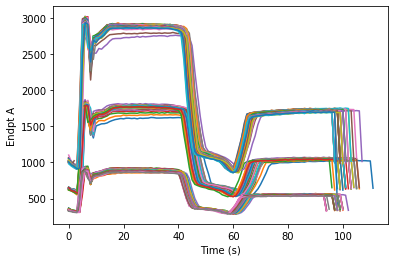

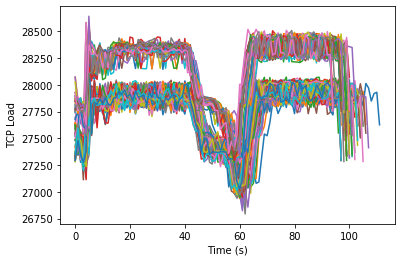

In [4]:
# plot data of a particular variable for all calibration experiment
plt.figure()
_ = [plt.plot(calibration_dataAll[expt,0][:,6]) for expt in range(calibration_dataAll.size)]
plt.xlabel('Time (s)')
plt.ylabel(variable_names[6])
plt.show()

plt.figure()
_ = [plt.plot(calibration_dataAll[expt,0][:,19]) for expt in range(calibration_dataAll.size)]
plt.xlabel('Time (s)')
plt.ylabel(variable_names[19])
plt.show()

In [5]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          perform Multiway PCA
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [6]:
# generate unfolded data matrix
n_vars = variable_names.size - 2 # first 2 columns are not process variables
n_samples = 85 # following the work of He et al.

unfolded_dataMatrix = np.empty((1,n_vars*n_samples))
for expt in range(calibration_dataAll.size):
    calibration_expt = calibration_dataAll[expt,0][5:90,2:] # removing first 5 measurements as done in He et al.
    
    if calibration_expt.shape[0] < 85:
        continue
    
    unfolded_row = np.ravel(calibration_expt, order='F')[np.newaxis,:]
    unfolded_dataMatrix = np.vstack((unfolded_dataMatrix, unfolded_row))

unfolded_dataMatrix = unfolded_dataMatrix[1:,:]

In [7]:
# scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_train_normal = scaler.fit_transform(unfolded_dataMatrix)

In [8]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 3) # following the work of He et al.
score_train = pca.fit_transform(data_train_normal)

Text(0, 0.5, 'PC2 scores')

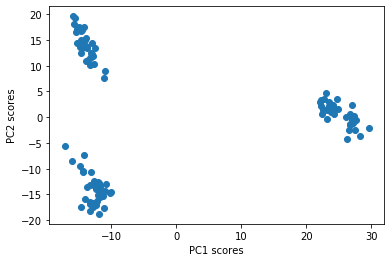

In [9]:
# visualize in 2D
plt.figure()
plt.scatter(score_train[:,0],score_train[:,1])
plt.xlabel('PC1 scores')
plt.ylabel('PC2 scores')